In [1]:
import pandas as pd
import numpy as np
data_actual= pd.read_csv("C:/Users/harsh/Downloads/character-predictions (1).csv")

In [2]:
data_actual.head()

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [3]:
def preprocess(data):
    death_preds = data
    death_preds.loc[:, "culture"] = pd.factorize(death_preds.culture)[0]
    death_preds.loc[:, "title"] = pd.factorize(death_preds.title)[0]
    death_preds.loc[:, "culture"] = pd.factorize(death_preds.culture)[0]
    death_preds.loc[:, "mother"] = pd.factorize(death_preds.mother)[0]
    death_preds.loc[:, "father"] = pd.factorize(death_preds.father)[0]
    death_preds.loc[:, "heir"] = pd.factorize(death_preds.heir)[0]
    death_preds.loc[:, "house"] = pd.factorize(death_preds.house)[0]
    death_preds.loc[:, "spouse"] = pd.factorize(death_preds.spouse)[0]

    death_preds.drop(["name", "alive", "pred", "plod", "isAlive"], 1, inplace = True)
    death_preds = death_preds.drop(['S.No'],1)
    death_preds = death_preds.drop(['DateoFdeath'],1)
    death_preds.fillna(value = -1, inplace = True)
    return death_preds


In [4]:
death_preds_p = preprocess(data_actual)


In [5]:
from random import sample
import sklearn
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score
import sys

#These all need to be installed to both run and visualize a tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
%matplotlib inline



In [6]:
def split_data(data_for_split):
    l = len(data_for_split)
    train_per = l*.80
    test_per = l*.20

    train_df= data_for_split.sample(frac=0.8 , replace = False )
    print(train_df.head())
    test_df = data_for_split.loc[~data_for_split.index.isin(train_df.index)]
    print(test_df.head())

    # Code here
    lab = 'actual'
    X_train =train_df.drop(lab, 1)
    y_train=train_df[lab]
    X_test=test_df.drop(lab, 1)
    y_test=test_df[lab]

    return X_train,y_train,X_test,y_test



In [7]:
X_train_p,y_train_p,X_test_p,y_test_p = split_data(death_preds_p)

      actual  title  male  culture  dateOfBirth  mother  father  heir  house  \
68         1     -1     1       13         -1.0      -1      -1    -1     30   
167        0     -1     0        5         -1.0      -1      -1    -1     -1   
828        1     52     0        0         -1.0      -1      -1    -1      5   
1821       0      1     1        0        233.0      -1      -1    -1      0   
662        1     -1     1        0         -1.0      -1      -1    -1    124   

      spouse     ...      isAliveFather  isAliveHeir  isAliveSpouse  \
68        -1     ...               -1.0         -1.0           -1.0   
167       -1     ...               -1.0         -1.0           -1.0   
828       -1     ...               -1.0         -1.0           -1.0   
1821     232     ...               -1.0         -1.0            1.0   
662       -1     ...               -1.0         -1.0           -1.0   

      isMarried  isNoble   age  numDeadRelations  boolDeadRelations  \
68            0      

In [8]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train_p, y_train_p)

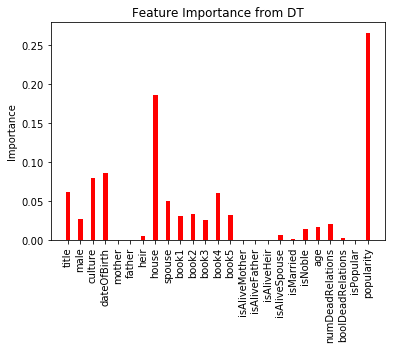

In [9]:

fig, ax = plt.subplots()
width = 0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax.bar(np.arange(25), clf.feature_importances_, width, color = 'r')
ax.set_xticks(np.arange(len(clf.feature_importances_)))
ax.set_xticklabels(X_train_p.columns.values, rotation = 90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Importance')


In [10]:
death_preds_p = death_preds_p.drop(['mother','father','isAliveMother','isAliveFather','isAliveHeir','isPopular'],1)

In [11]:
death_preds_p.head()

,actual,title,male,culture,dateOfBirth,heir,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,popularity
0,0,-1,1,0,-1.0,0,-1,-1,0,0,0,0,0,-1.0,0,0,-1.0,11,1,0.605351
1,1,0,1,1,208.0,-1,0,0,1,1,1,1,1,1.0,1,1,97.0,1,1,0.896321
2,1,1,1,0,-1.0,-1,1,-1,0,0,0,1,0,-1.0,0,1,-1.0,0,0,0.267559
3,0,2,0,0,82.0,-1,2,1,0,0,0,0,0,0.0,1,1,23.0,0,0,0.183946
4,1,3,0,2,276.0,-1,3,2,0,0,0,1,0,1.0,1,1,29.0,0,0,0.043478


In [12]:
X_train_f,y_train_f,X_test_f,y_test_f = split_data(death_preds_p)

      actual  title  male  culture  dateOfBirth  heir  house  spouse  book1  \
1825       0     -1     1        0         -1.0    -1     81      -1      0   
177        0     -1     0        0         -1.0    -1     13      -1      0   
1589       0      1     1        1         -1.0    -1     90      -1      1   
1753       0     -1     1        0         -1.0    -1     89      -1      1   
408        1      6     1        4         -1.0    -1     12      -1      0   

      book2  book3  book4  book5  isAliveSpouse  isMarried  isNoble  age  \
1825      1      1      1      0           -1.0          0        0 -1.0   
177       1      0      0      0           -1.0          0        0 -1.0   
1589      0      1      0      1           -1.0          0        1 -1.0   
1753      0      0      0      0           -1.0          0        0 -1.0   
408       0      0      0      0           -1.0          0        1 -1.0   

      numDeadRelations  boolDeadRelations  popularity  
1825        

In [13]:
roc_auc_score(y_test_p, clf.predict_proba(X_test_p)[:,1])

0.72687828271294808

In [14]:
def testTrees(X_train_t, y_train_t, X_test_t, y_test_t, dep, leaf, auc):
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = leaf, max_depth = dep)
    clf = clf.fit(X_train_t, y_train_t)
    if (auc==0):
        cm = confusion_matrix(clf.predict(X_test_t), y_test_t)
        return (cm[0][0] + cm[1][1]) / float(sum(cm))
    else:
        return roc_auc_score(y_test_t, clf.predict_proba(X_test_t)[:,1])
    


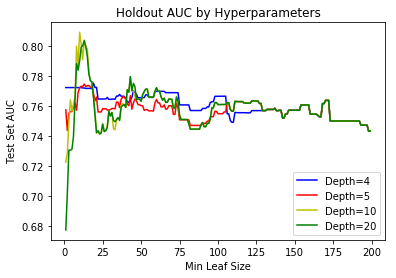

In [15]:
depths = [4, 5, 10, 20]
leaves = np.arange(1, 200)

#Run all of the options
run=1
if (run == 1):
    #Initialize dictionary of results
    res = dict()
    for d in depths:
        res[d] = list()

    #Now train and get results for each option
    for d in depths:
        for l in leaves:
            res[d].append(testTrees(X_train_f,y_train_f,X_test_f,y_test_f, d, l, 1))


#Now plot            
fig = plt.figure()
ax=fig.add_subplot(111)
plt.plot(leaves,res[depths[0]], 'b-', label = 'Depth={}'.format(depths[0]))
plt.plot(leaves,res[depths[1]], 'r-', label = 'Depth={}'.format(depths[1]))
plt.plot(leaves,res[depths[2]], 'y-', label = 'Depth={}'.format(depths[2]))
plt.plot(leaves,res[depths[3]], 'g-', label = 'Depth={}'.format(depths[3]))
plt.legend(loc = 4)
ax.set_xlabel('Min Leaf Size')
ax.set_ylabel('Test Set AUC')
plt.title('Holdout AUC by Hyperparameters')

In [16]:
# as highest is depth = 20 and leafsize = 25
#lets see the confusion matrix
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 25, max_depth = 20)
clf = clf.fit(X_train_f, y_train_f)
cm = confusion_matrix(clf.predict(X_test_f), y_test_f)
cm

array([[ 29,  18],
       [ 70, 272]])

from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold


In [18]:
#Use Kfold to create 4 folds
kfolds = KFold(death_preds_p.shape[0], n_folds = 4)
X = death_preds_p.drop('actual', 1)
Y = death_preds_p['actual']

#1st, set up a paramater grid
from sklearn import svm
param_grid_lr = {'C':[10**i for i in range(-8, 1)], 'penalty':['l1', 'l2']}

#2nd, call the GridSearchCV class, use LogisticRegression and 'log_loss' for scoring
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid_lr, cv = kfolds, scoring = 'log_loss') 
lr_grid_search.fit(X, Y)

#3rd, get the score of the best model and print it
best_1 = lr_grid_search.best_score_
print(best_1)

cm = confusion_matrix(clf.predict(X_test_f), y_test_f)

In [20]:

lr =lr_grid_search.best_estimator_
lr

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
cm1 = confusion_matrix(lr.predict(X_test_f),y_test_f)
cm1

array([[ 19,   8],
       [ 80, 282]])

In [22]:
from sklearn.metrics import accuracy_score


In [23]:
accuracy_score(clf.predict(X_test_f),y_test_f)

0.77377892030848328

In [24]:
accuracy_score(lr.predict(X_test_f),y_test_f)

0.77377892030848328

In [25]:
param_grid_sv = {'C':[10**i for i in range(-8, 1)],'probability':[True]}
sv_grid_search = GridSearchCV(svm.SVC(), param_grid_sv, cv = kfolds) 
sv_grid_search.fit(X, Y)



GridSearchCV(cv=sklearn.cross_validation.KFold(n=1946, n_folds=4, shuffle=False, random_state=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'probability': [True]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [26]:
sv_grid_search.best_score_

0.7456320657759506

In [27]:
sv =sv_grid_search.best_estimator_
sv

SVC(C=1e-08, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
cm1 = confusion_matrix(sv.predict(X_test_f),y_test_f)
cm1

array([[  0,   0],
       [ 99, 290]])

In [29]:
#decision tree performs much better and thought the accuracy is somewhat smiliar, our model is negative biased 

#to reduce bias we can oversample or undersample

In [30]:
from sklearn.metrics import roc_curve, auc

def plotROC(preds, truth, label_string):
    
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

0.77593173110414493

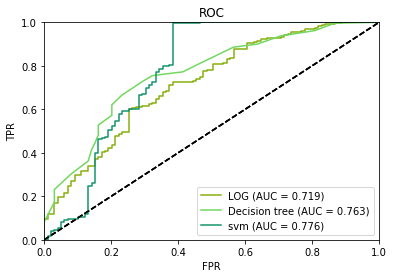

In [31]:
preds_lr = lr.predict_proba(X_test_f)[:, 1]
plotROC(preds_lr, y_test_f, 'LOG')

preds_clf = clf.predict_proba(X_test_f)[:, 1]
plotROC(preds_clf, y_test_f, 'Decision tree')

preds_sv = sv.predict_proba(X_test_f)[:, 1]
plotROC(preds_sv, y_test_f, 'svm')
